<a href="https://colab.research.google.com/github/RicStrong/HR_Dataset/blob/master/HRDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/rhuebner/human-resources-data-set/data#

For Data Dictionary, please see:
https://rpubs.com/rhuebner/HRCodebook-13

"The HR Dataset was designed by Drs. Rich Huebner and Carla Patalano to accompany a case study designed for graduate HR students studying HR metrics, measurement, and analytics."




In [0]:
from google.colab import files
uploaded = files.upload()

Saving HRDataset_v13.csv to HRDataset_v13.csv


In [0]:
%matplotlib inline
!pip install missingno
import pandas as pd 
import matplotlib.pyplot as plt
import io
from sklearn import decomposition, preprocessing, cluster, tree
from yellowbrick.cluster.silhouette import SilhouetteVisualizer
from scipy.cluster import hierarchy
import seaborn as sns


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
df = pd.read_csv(io.BytesIO(uploaded['HRDataset_v13.csv']))
# Dataset is now stored in a Pandas Dataframe

#Drop all the rows containing nothing but missing values
#I also checked for duplicates using df = df.drop_duplicates() but there are none after dropping empty rows
df = df.dropna(how = "all")

#Going to fill in the missing values with 0. There are 4 features this will change: DateofTermination (66.8%), ManagerID(2.65%), LastPerformanceReview_Date(33.2%), DaysLateLast30(33.2%)
#This will really clean up the data! I didn't think it would be as easy as dropping the extra rows and filling i
df = df.fillna(0)

#Changing DOB to datetime then float
df['DOB'] = pd.to_datetime(df['DOB'])
df['DOB'] = df['DOB'].values.astype(float)

#Changing LastPerformanceReview_Date to datetime then float
df['LastPerformanceReview_Date'] = pd.to_datetime(df['LastPerformanceReview_Date'])
df['LastPerformanceReview_Date'] = df['LastPerformanceReview_Date'].values.astype(float)

#Changing DateofHire to datetime then float
df['DateofHire'] = pd.to_datetime(df['DateofHire'])
df['DateofHire'] = df['DateofHire'].values.astype(float)

#Changing DateofTermination to datetime then float
df['DateofTermination'] = pd.to_datetime(df['DateofTermination'])
df['DateofTermination'] = df['DateofTermination'].values.astype(float)

In [0]:
#array(['US Citizen', 'Eligible NonCitizen', 'Non-Citizen'], dtype=object)
#array(['No', 'Yes', 'yes', 'no'], dtype=object)
#array(['N/A - still employed', 0, 'career change', 'Another position',
       #'attendance', 'relocation out of area',
       #'N/A - Has not started yet', 'performance', 'no-call, no-show',
       #'hours', 'medical issues', 'retiring', 'unhappy', 'more money',
       #'return to school', 'gross misconduct', 'military',
       #'maternity leave - did not return'], dtype=object)
#array(['Active', 'Terminated for Cause', 'Voluntarily Terminated',
       #'Future Start', 'Leave of Absence'], dtype=object)
#array(['MA', 'VA', 'VT', 'WA', 'NH', 'NY', 'OH', 'ID', 'TN', 'UT', 'AL',
       #'NC', 'MT', 'AZ', 'ME', 'CA', 'CT', 'IN', 'NV', 'CO', 'TX', 'GA',
       #'FL', 'KY', 'ND', 'OR', 'RI', 'PA'], dtype=object)


def tweak_set(df):
  
  EmpID = (df.EmpID.astype(int))
  MarriedID = (df.MarriedID.astype(int))
  MaritalStatusID = (df.MaritalStatusID.astype(int))
  GenderID = (df.GenderID.astype(int))
  EmpStatusID = (df.EmpStatusID.astype(int))
  DeptID = (df.DeptID.astype(int))
  PerfScoreID = (df.PerfScoreID.astype(int))
  FromDiversityJobFairID = (df.FromDiversityJobFairID.astype(int))
  PayRate = (df.PayRate.astype(int))
  Termd = (df.Termd.astype(int))
  PositionID = (df.PositionID.astype(int))
  State = (df.State
           .replace({'DE':1,
                     'PA':2,
                     'NJ':3,
                     'GA':4,
                     'CT':5,
                     'MA':6,
                     'MD':7,
                     'SC':8,
                     'NH':9,
                     'VA':10,
                     'NY':11,
                     'NC':12,
                     'RI':13,
                     'VT':14,
                     'KY':15,
                     'TN':16,
                     'OH':17,
                     'LA':18,
                     'IN':19,
                     'MS':20,
                     'IL':21,
                     'AL':22,
                     'ME':23,
                     'MO':24,
                     'AR':25,
                     'MI':26,
                     'FL':27,
                     'TX':28,
                     'IA':29,
                     'WI':30,
                     'CA':31,
                     'MN':32,
                     'OR':33,
                     'KS':34,
                     'WV':35,
                     'NV':36,
                     'NE':37,
                     'CO':38,
                     'ND':39,
                     'SD':40,
                     'MT':41,
                     'WA':42,
                     'ID':43,
                     'WY':44,
                     'UT':45,
                     'OK':46,
                     'NM':47,
                     'AZ':48,
                     'AK':49,
                     'HI':50})
           .astype(int))
  Zip = (df.Zip.astype(int))
  DOB = (df.DOB.astype(int))
  DateofHire = (df.DateofHire.astype(int))
  DateofTermination = (df.DateofTermination.astype(int))
  ManagerID = (df.ManagerID.astype(int))
  EngagementSurvey = (df.EngagementSurvey.astype(int))
  EmpSatisfaction = (df.EmpSatisfaction.astype(int))
  SpecialProjectsCount = (df.SpecialProjectsCount.astype(int))
  LastPerformanceReview_Date = (df.LastPerformanceReview_Date.astype(int))
  
  return pd.concat([EmpID, MarriedID, MaritalStatusID, GenderID, EmpStatusID, DeptID, PerfScoreID, FromDiversityJobFairID,  PayRate, Termd, PositionID, State,  Zip, DOB, DateofHire, DateofTermination, ManagerID, EngagementSurvey, EmpSatisfaction, SpecialProjectsCount, LastPerformanceReview_Date], axis=1)

df = tweak_set(df) 

#df.EmpStatusID.unique()

In [1]:
sns.heatmap(df.corr().sort_values(by = ['PayRate']), cmap = sns.diverging_palette(240, 10, n=9))
#test

NameError: ignored

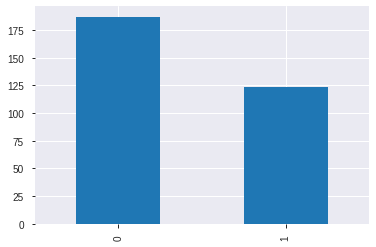

In [0]:

df.MarriedID.value_counts(dropna=False).plot(kind='bar')

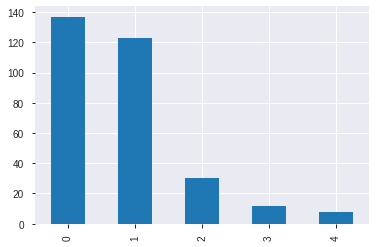

In [0]:
df.MaritalStatusID.value_counts(dropna=False).plot(kind='bar')

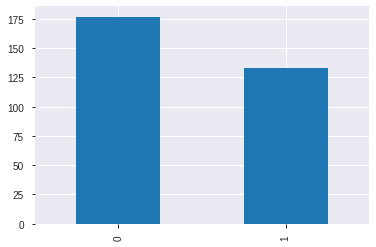

In [0]:
df.GenderID.value_counts(dropna=False).plot(kind='bar')

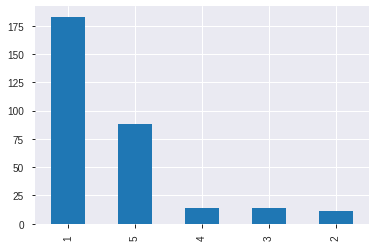

In [0]:
df.EmpStatusID.value_counts(dropna=False).plot(kind='bar')

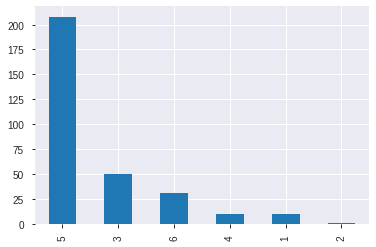

In [0]:
df.DeptID.value_counts(dropna=False).plot(kind='bar')

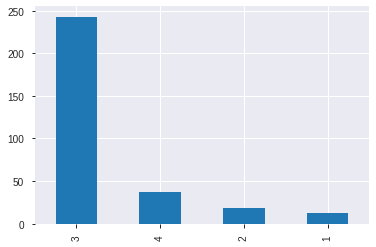

In [0]:
df.PerfScoreID.value_counts(dropna=False).plot(kind='bar')

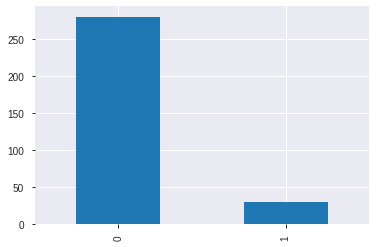

In [0]:
df.FromDiversityJobFairID.value_counts(dropna=False).plot(kind='bar')

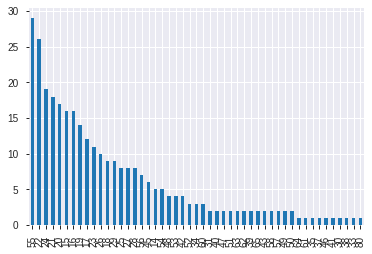

In [0]:
df.PayRate.value_counts(dropna=False).plot(kind='bar')

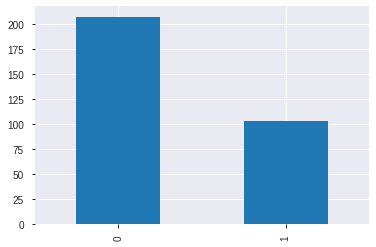

In [0]:
df.Termd.value_counts(dropna=False).plot(kind='bar')

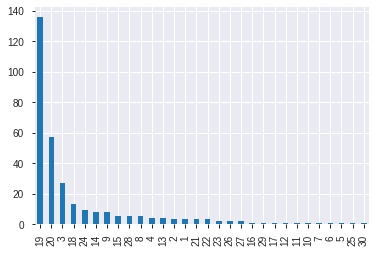

In [0]:
 df.PositionID.value_counts(dropna=False).plot(kind='bar')

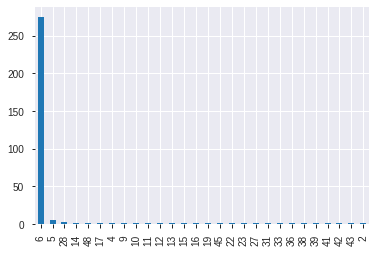

In [0]:
 df.State.value_counts(dropna=False).plot(kind='bar')

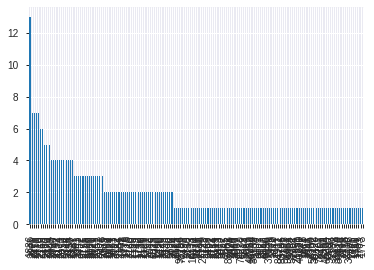

In [0]:
 df.Zip.value_counts(dropna=False).plot(kind='bar')

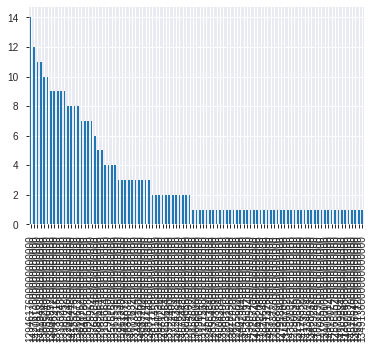

In [0]:
 df.DateofHire.value_counts(dropna=False).plot(kind='bar')

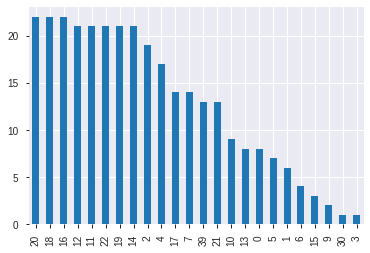

In [0]:
df.ManagerID.value_counts(dropna=False).plot(kind='bar')

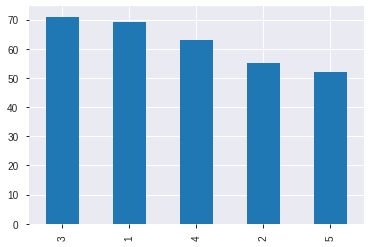

In [0]:
df.EngagementSurvey.value_counts(dropna=False).plot(kind='bar')

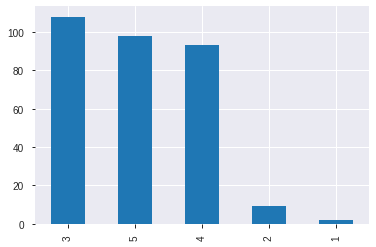

In [0]:
df.EmpSatisfaction.value_counts(dropna=False).plot(kind='bar')

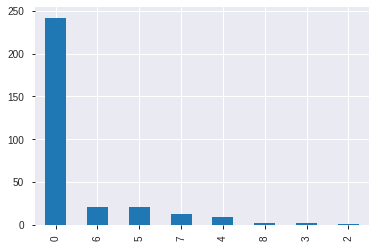

In [0]:
df.SpecialProjectsCount.value_counts(dropna=False).plot(kind='bar')

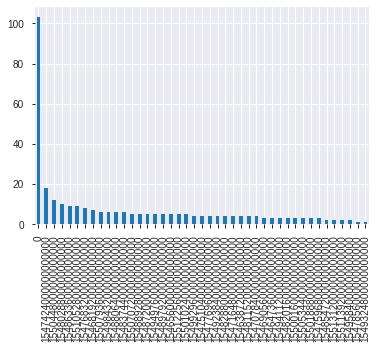

In [0]:
df.LastPerformanceReview_Date.value_counts(dropna=False).plot(kind='bar')

In [0]:
#ANALYSIS PART 1 (Principal Component Analysis)
#PCA - passing in rows of features, new dataset will be the embeddings (linear combinations of columns that maximize the variance) 
#Reduces the dimensionality of the data
#Code below standardizes the data
X = df
std = preprocessing.StandardScaler()
X_std = pd.DataFrame(std.fit_transform(X), columns=X.columns)
X_std

,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,Termd,PositionID,State,Zip,DOB,DateofHire,DateofTermination,ManagerID,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date
0,-0.529500,1.233015,0.201789,-0.866840,-0.779174,-3.337447,0.027992,3.112821,-0.208235,-0.705397,-2.545511,-0.254903,-0.302826,-0.230410,-2.203513,-0.704604,-1.590665,-0.658608,-2.079060,2.039987,0.703650
1,-0.513065,-0.811020,1.262035,1.153615,-0.779174,-3.337447,0.027992,-0.321252,-0.534259,-0.705397,-2.545511,-0.254903,-0.302234,-0.348512,0.487433,-0.704604,-1.590665,1.498102,0.120628,1.188275,0.703887
2,0.560086,-0.811020,-0.858457,1.153615,-0.779174,-3.337447,0.027992,-0.321252,-0.143030,-0.705397,-2.545511,-0.254903,-0.228712,-0.270982,0.864762,-0.704604,-1.590665,0.060295,1.220472,1.614131,0.704006
3,0.061892,1.233015,0.201789,-0.866840,-0.779174,-3.337447,0.027992,-0.321252,-0.664669,1.417642,-2.384797,-0.254903,-0.260239,-0.302609,1.063356,1.475516,-1.590665,0.060295,-0.979216,1.188275,-1.417640
4,0.587495,-0.811020,-0.858457,-0.866840,-0.779174,-3.337447,0.027992,-0.321252,-0.990694,-0.705397,-2.384797,-0.254903,-0.250775,-0.214416,1.168327,-0.704604,-1.590665,1.498102,-0.979216,1.614131,0.703650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,1.156907,1.233015,0.201789,-0.866840,0.336502,-1.486627,0.027992,-0.321252,1.487092,-0.705397,1.793782,-0.404561,-0.031747,1.886835,0.924340,-0.704604,-0.867812,-1.377512,1.220472,2.891699,0.706966
306,-0.502107,1.233015,0.201789,1.153615,0.336502,-1.486627,0.027992,-0.321252,1.617502,-0.705397,1.793782,-0.254903,-0.260298,-0.282820,0.924340,-0.704604,-0.867812,0.779199,1.220472,2.039987,0.702703
307,-1.618988,1.233015,0.201789,1.153615,-0.221336,-1.486627,0.027992,-0.321252,1.421887,-0.705397,1.793782,-0.254903,-0.297207,-0.388452,1.772619,-0.704604,-0.867812,0.060295,0.120628,1.614131,0.703532
308,0.592975,-0.811020,-0.858457,1.153615,-0.779174,-1.486627,0.027992,-0.321252,1.421887,-0.705397,1.793782,-0.404561,-0.017256,2.337104,0.924340,-0.704604,-0.867812,1.498102,-0.979216,1.188275,0.702111


In [0]:
#ANALYSIS PART 1 (Principal Component Analysis)
#Make an instance of PCA
pca = decomposition.PCA()
pca_X = pd.DataFrame(pca.fit_transform(X_std), columns=[f'PC{i+1}' for i in range(len(X.columns))])
pca_X

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21
0,-1.596344,-2.051284,2.770144,2.408002,0.485354,-0.345352,0.147901,3.158058,3.267071,-0.611798,-0.285324,-0.520647,-0.106072,2.452414,0.397005,0.569312,0.131053,-0.128090,-0.185750,-0.011245,-0.001292
1,-2.418278,-2.123340,1.830460,-0.208514,-0.300585,-0.931120,-0.201707,-1.230623,1.719766,1.432650,-0.155838,0.021866,-0.305820,2.733909,-0.632575,-0.470115,1.037933,-0.000626,-0.317709,0.005044,-0.000896
2,-2.821968,-2.143198,2.085642,-0.597471,0.694406,0.594169,-0.179225,-0.995108,0.250957,0.091533,0.751641,-0.704439,0.205940,2.898078,-0.495032,-0.673886,0.970629,0.001906,-0.331011,0.004411,-0.000651
3,0.333575,-2.265111,3.177641,0.709826,-0.680418,-1.284892,-0.934015,0.765498,-0.294759,0.312084,0.516709,0.468107,1.342733,2.560627,-0.719718,-0.295746,1.199976,0.131902,1.497554,0.010197,0.000455
4,-2.606156,-2.239976,1.457953,0.479452,-0.462629,-0.233440,-2.354283,-0.118096,0.909073,0.715748,0.508703,-0.286803,1.385138,2.832728,-0.270059,-0.344485,0.678279,-0.003649,-0.334209,0.014751,-0.001179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,-1.666164,-2.255635,1.270948,1.373376,2.201691,-0.525497,-0.241483,0.244790,-2.457481,-0.282920,0.683544,-0.085202,-0.841944,-1.272866,1.678509,-0.887679,-0.623985,-0.262962,-0.698788,-0.013671,0.000893
306,-1.608853,-2.596355,1.247894,-0.355801,-0.032708,-0.758260,0.602383,-1.258471,-0.280734,-0.502991,0.598719,-0.276036,-0.929795,-1.874773,1.047877,-0.813842,-0.181148,0.023853,-0.704265,-0.008391,-0.001903
307,-1.944214,-2.767694,1.121398,-0.141374,-0.865170,-0.223808,1.047492,-0.545756,-0.312415,-0.043961,0.249331,0.785383,-0.358820,-2.135156,0.696079,-0.690057,0.172027,0.084989,-0.228811,0.013091,-0.001256
308,-2.012130,-1.590544,0.425522,1.634305,0.555552,1.050519,-1.840224,-2.360795,0.141487,-0.276400,-0.436921,0.777524,-0.474026,-1.369867,1.135345,-0.425307,0.485587,-0.246822,0.100397,0.033385,-0.002028


In [0]:
#Nearly 3% of the variance can be explained
pca.explained_variance_ratio_

array([2.20954805e-01, 1.33961094e-01, 1.05820968e-01, 6.53959719e-02,
       6.39424804e-02, 5.74949598e-02, 4.70566346e-02, 4.58715774e-02,
       4.43680711e-02, 3.84605922e-02, 3.49563440e-02, 3.29022688e-02,
       2.97133339e-02, 2.58475728e-02, 2.31523281e-02, 1.73494050e-02,
       6.99934267e-03, 2.95351931e-03, 2.73601581e-03, 6.26587027e-05,
       5.63938674e-08])

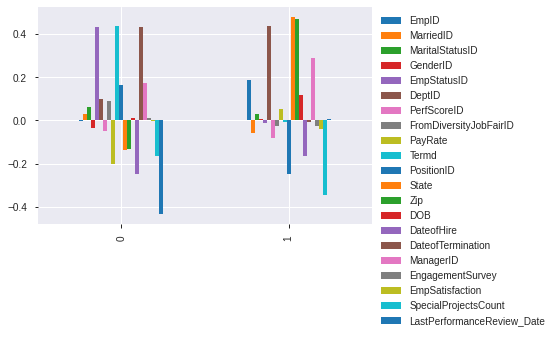

In [0]:
(pd.DataFrame(pca.components_, columns=X.columns)
 .iloc[0:2]
 .plot.bar()
 .legend(bbox_to_anchor=(1,1)))

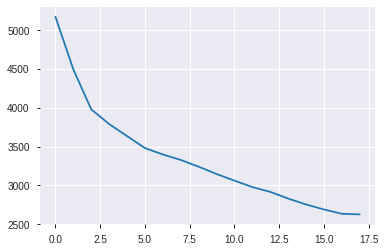

In [0]:
#ANALYSIS PART 2 (Clustering)
#First method for estimating the appropriate number of clusters 
inerts = []
for i in range(2, 20):
    k = cluster.KMeans(n_clusters=i, random_state=42)
    k.fit(X_std)
    inerts.append(k.inertia_)
    
pd.Series(inerts).plot()

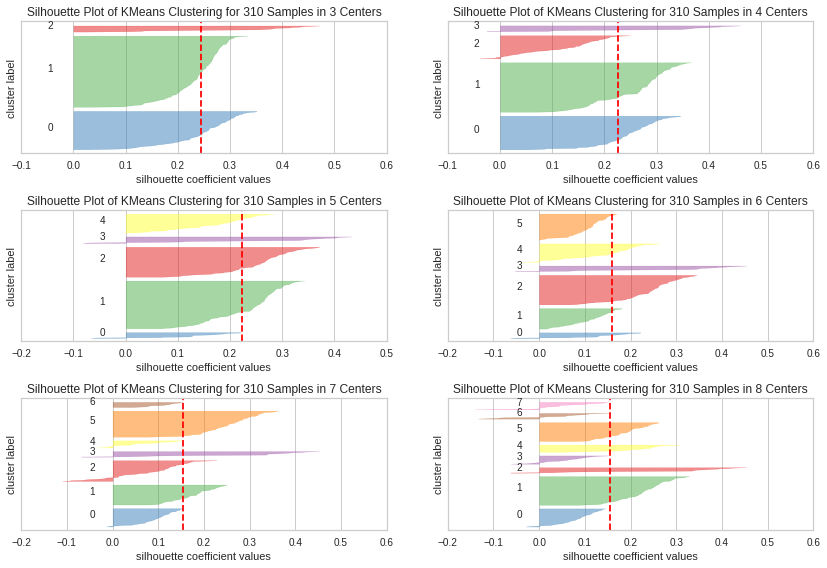

In [0]:
#ANALYSIS PART 2 (Clustering)
#Second method for estimating the appropriate number of clusters 
#This may take a while to run...
start, end = 3, 9
cols = 2
rows = ((end - start) // cols)
fix, axes = plt.subplots(rows, cols, figsize=(12,8))
axes = axes.reshape(cols * rows)
for i, k in enumerate(range(start, end), 0):
    ax = axes[i]
    sil = SilhouetteVisualizer(cluster.KMeans(n_clusters=k, random_state=42), ax=ax)
    sil.fit(X_std)
    sil.finalize()
plt.tight_layout()

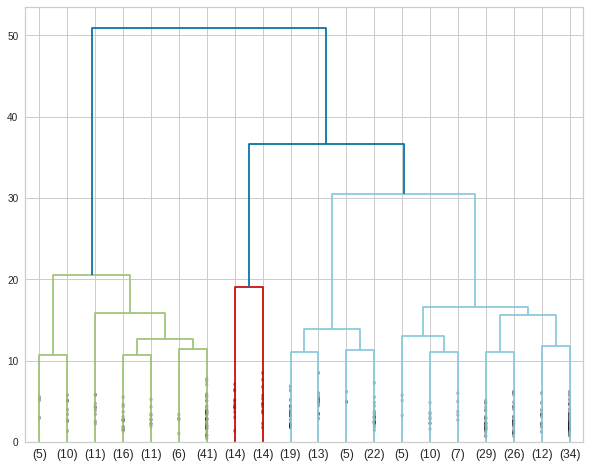

In [0]:
#ANALYSIS PART 2 (Clustering- building a heirarchy)
#Try another mechanism
#Third method for estimating the appropriate number of clusters 
#This one also takes a while, you may need to increase RAM
fig, ax = plt.subplots(figsize=(10,8))
hierarchy.dendrogram(hierarchy.linkage(X_std, method='ward'),
                    truncate_mode='lastp', p=20, show_contracted=True)
pass  # here to hide return value of above

In [0]:
#ANALYSIS PART 2 (K-Means Clustering)
# going to choose 12 clusters this time...
k3 = cluster.KMeans(n_clusters=3, random_state=42)
k3.fit(X_std)
labels = k3.predict(X_std)


In [0]:
#ANALYSIS PART 2 (K-Means Clustering)
#Assigning cluster labels to each row 
X.assign(label=labels)

,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,Termd,PositionID,State,Zip,DOB,DateofHire,DateofTermination,ManagerID,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,label
0,1103024456,1,1,0,1,1,3,1,28,0,1,6,1450,564710400000000000,1225065600000000000,0,1,2,2,6,1547510400000000000,1
1,1106026572,0,2,1,1,1,3,0,23,0,1,6,1460,451785600000000000,1388966400000000000,0,1,5,4,4,1547683200000000000,1
2,1302053333,0,0,1,1,1,3,0,29,0,1,6,2703,525916800000000000,1411948800000000000,0,1,3,5,5,1547769600000000000,1
3,1211050782,1,1,0,1,1,3,0,21,1,2,6,2170,495676800000000000,1424044800000000000,1429056000000000000,1,3,3,4,0,0
4,1307059817,0,0,0,1,1,3,0,16,0,2,6,2330,580003200000000000,1430438400000000000,0,1,5,3,5,1547510400000000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,1411071312,1,1,0,3,3,3,0,54,0,28,5,6033,2589148800000000000,1415577600000000000,0,7,1,5,8,1549929600000000000,1
306,1108028108,1,1,1,3,3,3,0,56,0,28,6,2169,514598400000000000,1415577600000000000,0,7,4,5,6,1546819200000000000,1
307,904013591,1,1,1,2,3,3,0,53,0,28,6,1545,413596800000000000,1467244800000000000,0,7,3,4,5,1547424000000000000,1
308,1308060959,0,0,1,1,3,3,0,53,0,28,5,6278,3019680000000000000,1415577600000000000,0,7,5,3,4,1546387200000000000,1


In [0]:
#ANALYSIS PART 2 (K-Means Clustering)
#Looking at tool mean usage and variance for each cluster
(X.assign(label=labels)
  .groupby('label')
  .agg(['mean', 'var'])
  .T
)

label                                       0             1             2
EmpID                      mean  1.190557e+09  1.194662e+09  1.312236e+09
                           var   2.828075e+16  3.638167e+16  2.212949e+16
MarriedID                  mean  4.466019e-01  3.736842e-01  3.529412e-01
                           var   2.495717e-01  2.352827e-01  2.426471e-01
MaritalStatusID            mean  9.417476e-01  7.368421e-01  8.235294e-01
                           var   8.985342e-01  8.721805e-01  1.029412e+00
GenderID                   mean  4.174757e-01  4.263158e-01  5.294118e-01
                           var   2.455740e-01  2.458647e-01  2.647059e-01
EmpStatusID                mean  4.825243e+00  1.200000e+00  1.058824e+00
                           var   2.632781e-01  3.089947e-01  5.882353e-02
DeptID                     mean  4.699029e+00  4.447368e+00  5.823529e+00
                           var   8.399010e-01  1.253829e+00  5.294118e-01
PerfScoreID                mean  2.902913e+00  3.042105e+00  2.823529e+00
                           var   3.238150e-01  2.839321e-01  9.044118e-01
FromDiversityJobFairID     mean  1.553398e-01  6.315789e-02  5.882353e-02
                           var   1.324957e-01  5.948204e-02  5.882353e-02
PayRate                    mean  2.692233e+01  3.146842e+01  5.400000e+01
                           var   1.534645e+02  2.440916e+02  2.437500e+01
Termd                      mean  1.000000e+00  0.000000e+00  0.000000e+00
                           var   0.000000e+00  0.000000e+00  0.000000e+00
PositionID                 mean  1.828155e+01  1.726316e+01  3.352941e+00
                           var   2.273368e+01  3.338012e+01  2.117647e+00
State                      mean  6.194175e+00  6.247368e+00  3.311765e+01
                           var   2.452123e+00  2.822083e+00  8.998529e+01
Zip                        mean  3.253777e+03  2.548247e+03  7.160653e+04
                           var   3.412703e+07  8.380460e+06  4.644395e+08
DOB                        mean  7.991757e+17  7.668023e+17  9.028800e+17
                           var   9.612640e+35  8.964849e+35  9.758838e+35
DateofHire                 mean  1.323907e+18  1.378790e+18  1.355504e+18
                           var   1.962280e+33  3.467469e+33  5.818609e+33
DateofTermination          mean  1.390076e+18  0.000000e+00  0.000000e+00
                           var   2.931703e+33  0.000000e+00  0.000000e+00
ManagerID                  mean  1.686408e+01  1.236842e+01  1.858824e+01
                           var   1.086480e+02  4.388471e+01  1.788235e+01
EngagementSurvey           mean  2.922330e+00  2.936842e+00  2.647059e+00
                           var   2.052732e+00  1.943080e+00  1.367647e+00
EmpSatisfaction            mean  3.873786e+00  3.926316e+00  3.588235e+00
                           var   7.388159e-01  8.305207e-01  1.382353e+00
SpecialProjectsCount       mean  7.378641e-01  1.547368e+00  2.941176e-01
                           var   3.450219e+00  6.746422e+00  1.470588e+00
LastPerformanceReview_Date mean  0.000000e+00  1.548810e+18  1.548491e+18
                           var   0.000000e+00  2.122721e+30  8.042946e+29

In [0]:
#ANALYSIS PART 2 (K-Means Clustering)
#How many developers in each cluster?
pd.Series(labels).value_counts().sort_index()

0    103
1    190
2     17
dtype: int64

In [0]:
#ANALYSIS PART 2 (K-Means Clustering)
# Add coloring to aid impact to clusters
(X.assign(label=labels)
  .groupby('label')
  .mean()
  .T
 .style.background_gradient(cmap='RdBu', axis=1)
)

label,0,1,2
EmpID,1190556803.320388,1194661521.357895,1312236371.000000
MarriedID,0.446602,0.373684,0.352941
MaritalStatusID,0.941748,0.736842,0.823529
GenderID,0.417476,0.426316,0.529412
EmpStatusID,4.825243,1.200000,1.058824
DeptID,4.699029,4.447368,5.823529
PerfScoreID,2.902913,3.042105,2.823529
FromDiversityJobFairID,0.155340,0.063158,0.058824
PayRate,26.922330,31.468421,54.000000
Termd,1.000000,0.000000,0.000000


In [0]:
#Matching Manager Names to DepartmentIDs

#df =df[df.ManagerName == 'Manager Name']
#df.DeptID.unique()

#I was doing things the tedious way before finding this awesome approach using groupby!
#I was setting the dataframe equal to each manager name, then observing the unique values for DeptID to determine how they match up
#This is faster, much more consistent, and gets me one step closer to filling in missing values

group = df.groupby('ManagerName')
df2 = group.apply(lambda x: x['DeptID'].unique())
df2

ManagerName
Alex Sweetwater                      [4.0]
Amy Dunn                             [5.0]
Board of Directors              [2.0, 1.0]
Brandon R. LeBlanc                   [1.0]
Brannon Miller                       [5.0]
Brian Champaigne                     [3.0]
David Stanley                        [5.0]
Debra Houlihan                       [6.0]
Elijiah Gray                         [5.0]
Eric Dougall                         [3.0]
Janet King            [3.0, 5.0, 6.0, 1.0]
Jennifer Zamora                 [3.0, 4.0]
John Smith                           [6.0]
Kelley Spirea                        [5.0]
Ketsia Liebig                        [5.0]
Kissy Sullivan                       [5.0]
Lynn Daneault                        [6.0]
Michael Albert                       [5.0]
Peter Monroe                         [3.0]
Simon Roup                           [3.0]
Webster Butler                       [5.0]
dtype: object

In [0]:
#Creating a dictionary

Dict1 = {}

#Adding list as values
Dict1["Alex Sweetwater"] = [4.0]
Dict1["Amy Dunn"] = [5.0]
#Dict1["Board of Directors "] = [2.0, 1.0]
Dict1["Brandon R. LeBlanc"] = [1.0]
Dict1["Brannon Miller "] = [5.0]
Dict1["Brian Champaigne"] = [3.0]
Dict1["David Stanley "] = [5.0]
Dict1["Debra Houlihan"] = [6.0]
Dict1["Elijiah Gray"] = [5.0]
Dict1["Eric Dougall"] = [3.0]
#Dict1["Janet King"] = [3.0, 5.0, 6.0, 1.0]
#Dict1["Jennifer Zamora"] = [3.0, 4.0]
Dict1["John Smith"] = [6.0]
Dict1["Kelley Spirea"] = [5.0]
Dict1["Ketsia Liebig"] = [5.0]
Dict1["Kissy Sullivan"] = [5.0]
Dict1["Lynn Daneault"] = [6.0]
Dict1["Michael Albert"] = [5.0]
Dict1["Peter Monroe"] = [3.0]
Dict1["Simon Roup"] = [3.0]
Dict1["Webster Butler"] = [5.0]

print(Dict1)


In [0]:
df.DeptID = df.DeptID.fillna(df.ManagerName.map(Dict1))

In [0]:
df.isna().mean() * 100

In [0]:
#Spacer


In [0]:
#Matching ManagerNames to ManagerID
group = df.groupby('ManagerName')
df3 = group.apply(lambda x: x['ManagerID'].unique())
df3

ManagerName
Alex Sweetwater             [10.0]
Amy Dunn                    [11.0]
Board of Directors           [9.0]
Brandon R. LeBlanc      [1.0, 3.0]
Brannon Miller              [12.0]
Brian Champaigne            [13.0]
David Stanley               [14.0]
Debra Houlihan              [15.0]
Elijiah Gray                [16.0]
Eric Dougall                 [6.0]
Janet King                   [2.0]
Jennifer Zamora              [5.0]
John Smith                  [17.0]
Kelley Spirea               [18.0]
Ketsia Liebig               [19.0]
Kissy Sullivan              [20.0]
Lynn Daneault               [21.0]
Michael Albert        [22.0, 30.0]
Peter Monroe                 [7.0]
Simon Roup                   [4.0]
Webster Butler         [39.0, 0.0]
dtype: object

In [0]:
#Matching Position to PositionID
group = df.groupby('Position')
df4 = group.apply(lambda x: x['PositionID'].unique())
df4

Position
Accountant I                           [1.0]
Administrative Assistant               [2.0]
Area Sales Manager                     [3.0]
BI Developer                           [4.0]
BI Director                            [5.0]
CIO                                    [6.0]
Data Analyst                           [9.0]
Data Analyst                           [9.0]
Data Architect                         [7.0]
Database Administrator                 [8.0]
Director of Operations                [10.0]
Director of Sales                     [11.0]
Enterprise Architect                  [30.0]
IT Director                           [12.0]
IT Manager - DB                       [13.0]
IT Manager - Infra                    [13.0]
IT Manager - Support                  [13.0]
IT Support                            [14.0]
Network Engineer                      [15.0]
President & CEO                       [16.0]
Principal Data Architect              [29.0]
Production Manager              [17.0, 18.0]
P

In [0]:
#Matching MaritalDesc And MarriedID
group = df.groupby('MarriedID')
df5 = group.apply(lambda x: x['MaritalDesc'].unique())
df5

MarriedID
0.0    [Divorced, Single, Widowed, Separated]
1.0                                 [Married]
dtype: object

In [0]:
#Matching PerformanceScore and PerfScoreID
group = df.groupby('PerformanceScore')
df6 = group.apply(lambda x: x['PerfScoreID'].unique())
df6

PerformanceScore
Exceeds              [4.0]
Fully Meets          [3.0]
Needs Improvement    [2.0]
PIP                  [1.0]
dtype: object

In [0]:
#Matching Position to Department
#Each position rolls up into one department, which is nice to see!
group = df.groupby('Position')
df6 = group.apply(lambda x: x['Department'].unique())
df6

Position
Accountant I                           [Admin Offices]
Administrative Assistant               [Admin Offices]
Area Sales Manager                             [Sales]
BI Developer                                   [IT/IS]
BI Director                                    [IT/IS]
CIO                                            [IT/IS]
Data Analyst                                   [IT/IS]
Data Analyst                                   [IT/IS]
Data Architect                                 [IT/IS]
Database Administrator                         [IT/IS]
Director of Operations             [Production       ]
Director of Sales                              [Sales]
Enterprise Architect                           [IT/IS]
IT Director                                    [IT/IS]
IT Manager - DB                                [IT/IS]
IT Manager - Infra                             [IT/IS]
IT Manager - Support                           [IT/IS]
IT Support                                     [IT/IS]
N

In [0]:
#Sex vs GenderID
#Not the most inclusive category grouping, but we'll run with it for the dataset
group = df.groupby('Sex')
df6 = group.apply(lambda x: x['GenderID'].unique())
df6


Using this space as a placeholder to strategize
Need to turn these objects in to dictionaries

dict = {'b' : '5', 'c' : '4'}

   A  B
0  a  2
1  b  NaN
2  c  NaN

df.B = df.B.fillna(df.A.map(dict))

    A   B
0   a   2
1   b   5
2   c   4





Space


In [0]:
#Let's check out the missing values
msno.matrix(df) 

In [0]:
#Drop NA returns a dataframe with no values- lots of missing data and dropping won't cut it
msno.bar(df) 

In [0]:
df.Department.unique()

In [0]:
df.DeptID.unique()

In [0]:
#Let's look at department vs manager. I hypothesize that each manager aligns to a business area. 
df.Department.value_counts(dropna=False).plot(kind='bar')

In [0]:
df.ManagerName.value_counts(dropna=False).plot(kind='bar')

In [0]:
df.ManagerID.unique()